### **Step 1: Import Libraries & Load the Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Load dataset
df = pd.read_csv("./fake_bills.csv", sep=';')

In [8]:
# Display first few rows
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
# Check basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


In [10]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [19]:
# Fill missing values with column mean (a safe choice for numeric data)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [22]:
# Confirm no missing values remain
print("\nAfter filling:")
print(df.isnull().sum().sum(), "missing values remain.")


After filling:
0 missing values remain.


### **Step 2: Check Data Types & Convert Target**

In [23]:
# Step 2: Convert target column to numeric
df['is_genuine'] = df['is_genuine'].astype(int)

In [24]:
# Verify conversion
print(df['is_genuine'].value_counts())

is_genuine
1    1000
0     500
Name: count, dtype: int64


In [25]:
# Basic statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1500.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.485967   
std       0.471562     0.305195     0.299462      0.325627     0.655569   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.030000   
50%       1.000000   171.960000   104.040000    103.920000     4.330000   
75%       1.000000   172.170000   104.230000    104.150000     4.860000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000  


### **Step 3: Split Features and Target, then Train-Test Split**

In [26]:
# Step 4: Split features (X) and target (y)
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

In [27]:
# Train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1200, 6)
Test set size: (300, 6)


### **Step 4: Feature Scaling (Standardization)**

In [29]:
# Step 5: Scale features
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Step 5: Find best K value**

In [30]:
accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

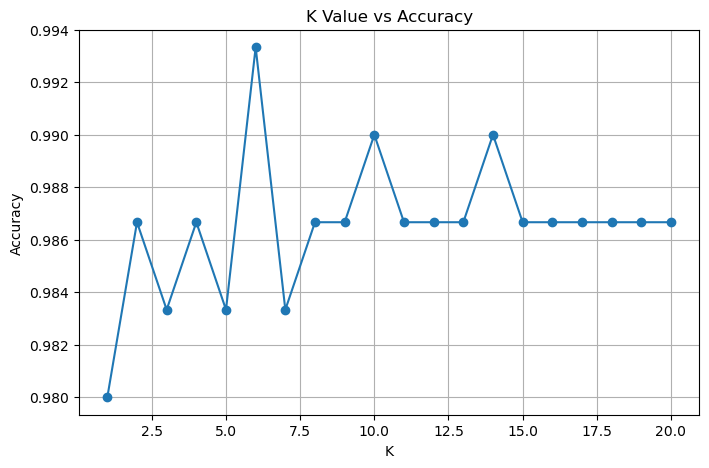

In [31]:
# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [32]:
# Print best K
best_k = np.argmax(accuracy_scores) + 1
print(f"Best K value: {best_k}")
print(f"Best Accuracy: {max(accuracy_scores):.4f}")

Best K value: 6
Best Accuracy: 0.9933


### **Step 6: Train Final Model & Evaluate**

In [33]:
# Step 6: Train final model using best K
best_k = 6
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [34]:
# Predictions
y_pred = knn_final.predict(X_test_scaled)

In [35]:
# Evaluation
print(f"Accuracy with k={best_k}: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy with k=6: 0.9933

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



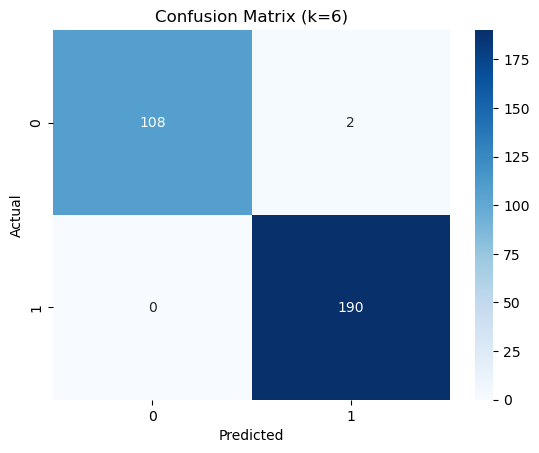

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Step 7: Predict on Manual Input**

In [37]:
# Step 7: Manual input prediction
print("Enter new bill details to predict:")

diagonal = float(input("Diagonal: "))
height_left = float(input("Height Left: "))
height_right = float(input("Height Right: "))
margin_low = float(input("Margin Low: "))
margin_up = float(input("Margin Up: "))
length = float(input("Length: "))

Enter new bill details to predict:


Diagonal:  170.88
Height Left:  105.43
Height Right:  106.44
Margin Low:  4.97
Margin Up:  3.88
Length:  114.65


In [38]:
# Create a dataframe for new input
new_data = pd.DataFrame([[diagonal, height_left, height_right, margin_low, margin_up, length]],
                        columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

In [39]:
# Scale new data using the same scaler
new_data_scaled = scaler.transform(new_data)

In [40]:
# Predict
prediction = knn_final.predict(new_data_scaled)

In [41]:
# Output result
if prediction[0] == 1:
    print("\n The bill is **GENUINE**")
else:
    print("\n The bill is **FAKE**")


 The bill is **FAKE**
